- https://medium.com/@stepanfilonov/tracking-your-eyes-with-python-3952e66194a6
- https://github.com/stepacool/Eye-Tracker

In [3]:
from matplotlib import pyplot as plt
import dlib
import cv2
import numpy as np

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [8]:
#filename = '../dataset/center/2018-09-04_Laurent_104.png' 
#filename = '../dataset/center/2018-09-04_Laurent_6.png' 

#filename = '../dataset/left/2018-09-04_Laurent_129.png'
#filename = '../dataset/blink/2018-10-24_Laurent_212.png'
filename = 'dataset/blink/2018-09-04_Laurent_27.png'
#threshold = 130

https://pysource.com/2019/01/07/eye-detection-gaze-controlled-keyboard-with-python-and-opencv-p-1/

1


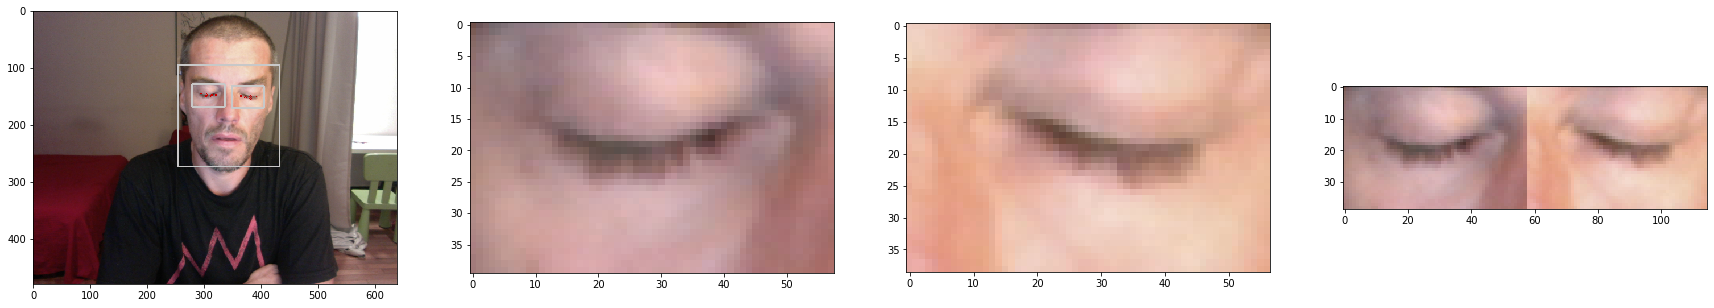

In [9]:
# 20200221
import imageio
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = imageio.imread(filename) #cv2.imread(filename)

sx = int(np.size(image, 0)/30)
sy = int(np.size(image, 1)/30)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)
print(len(rects))#, dlib.rectangle([]))

if len(rects) ==  0 :
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rects = detector(gray, 0)
    print(rects,len(rects))

fig, ax = plt.subplots(1,4,figsize=(30,30))
for (i, rect) in enumerate(rects):
    
    cv2.rectangle(image,(rect.left(), rect.top()), (rect.right(), rect.bottom()), (200,200,200), 2)
    pred = predictor(gray, rect)
    eyes = []
    for x, y in zip([(pred.part(36).x-sx, pred.part(39).x+sx), (pred.part(42).x-sx, pred.part(45).x+sx)],
                    [(pred.part(40).y-sy, pred.part(37).y+sy), (pred.part(47).y-sy, pred.part(43).y+sy)]) :
        eyes.append(np.copy(image[y[0]:y[1], x[0]:x[1]]))
        cv2.rectangle(image,(x[0], y[0]), (x[1], y[1]),(200,200,200),2)
    for i in range(36, 48) : cv2.circle(image, (pred.part(i).x, pred.part(i).y), 2, (200, 0, 0), 1)

#cv2.waitKey(0)
cv2.destroyAllWindows()

ax[0].imshow(image)
for x in range(len(eyes)) : ax[x+1].imshow(eyes[x])
ax[3].imshow(np.concatenate([eyes[0][:np.min([np.shape(eyes[0])[0], np.shape(eyes[1])[0]])],
                             eyes[1][:np.min([np.shape(eyes[0])[0], np.shape(eyes[1])[0]])]], axis=1))
plt.show()

1


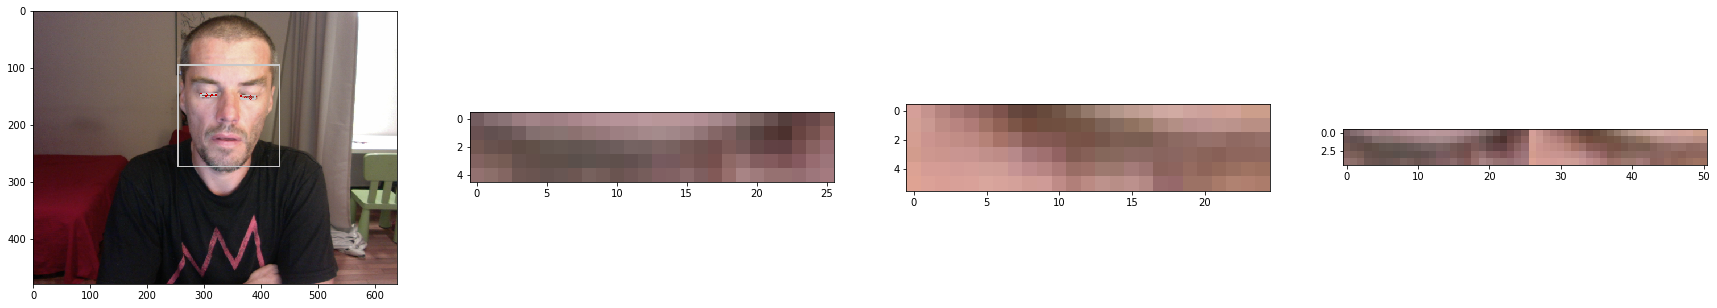

In [10]:
# 20200707

import imageio
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = imageio.imread(filename) #cv2.imread(filename)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)
print(len(rects))#, dlib.rectangle([]))

if len(rects) ==  0 :
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rects = detector(gray, 0)
    #print(rects,len(rects))

fig, ax = plt.subplots(1,4,figsize=(30,30))
for (i, rect) in enumerate(rects):
    
    cv2.rectangle(image,(rect.left(), rect.top()), (rect.right(), rect.bottom()), (200,200,200), 2)
    pred = predictor(gray, rect)
    eyes = []
    
    for e in [range(36, 42), range(42, 48)] :
        
        x = [pred.part(i).x for i in e]
        y = [pred.part(i).y for i in e]
        
        miny = np.min(y)-int((np.max(y)-np.min(y))/3)
        maxy = np.max(y)+int((np.max(y)-np.min(y))/3)
        
        eyes.append(np.copy(image[miny:maxy, np.min(x):np.max(x)]))
        cv2.rectangle(image,(np.min(x), miny), (np.max(x), maxy),(200,200,200),2)
        
        #eyes.append(np.copy(image[np.min(y):np.max(y), np.min(x):np.max(x)]))
        #cv2.rectangle(image,(np.min(x), np.min(y)), (np.max(x), np.max(y)),(200,200,200),2)
        
    for i in range(36, 48) : cv2.circle(image, (pred.part(i).x, pred.part(i).y), 2, (200, 0, 0), 1)

#cv2.waitKey(0)
cv2.destroyAllWindows()

ax[0].imshow(image)
for x in range(len(eyes)) : ax[x+1].imshow(eyes[x])
ax[3].imshow(np.concatenate([eyes[0][:np.min([np.shape(eyes[0])[0], np.shape(eyes[1])[0]])],
                             eyes[1][:np.min([np.shape(eyes[0])[0], np.shape(eyes[1])[0]])]], axis=1))
plt.show()

# Fonction

In [5]:
detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 100
detector = cv2.SimpleBlobDetector_create(detector_params)

def blob_process(img, detector, threshold):
    gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(gray_frame, threshold, 255, cv2.THRESH_BINARY)
    
    print(len([img[y][x] for x in range(len(img[0]))
               for y in range(len(img)) if img[y][x]==0]))
    
    img = cv2.erode(img, None, iterations=2) #1
    img = cv2.dilate(img, None, iterations=4) #2
    img = cv2.medianBlur(img, 5) #3
    keypoints = detector.detect(img)
    return keypoints

823
203


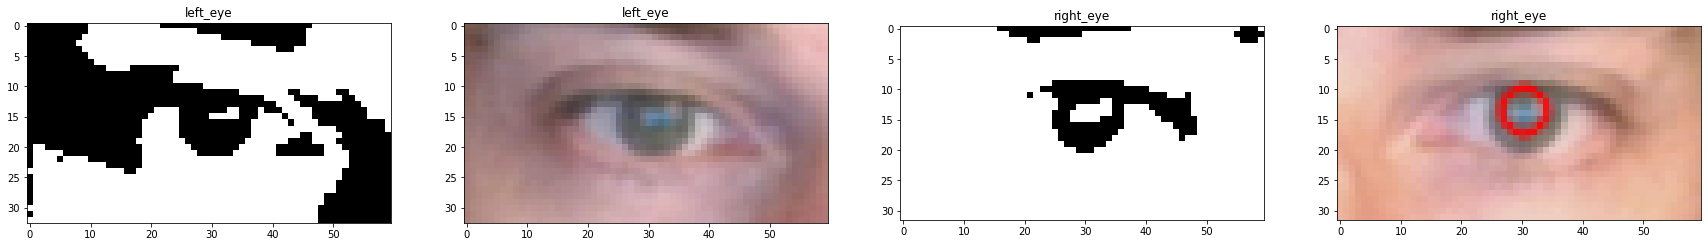

In [6]:
threshold = 130


fig, ax = plt.subplots(1,4, figsize=(30,30))
n = 0
for e, title in zip(np.copy(eyes), ['left_eye', 'right_eye']) :
    eye = cv2.cvtColor(e, cv2.COLOR_BGR2GRAY)
    _, i = cv2.threshold(eye, threshold, 255, cv2.THRESH_BINARY)

    ax[n].imshow(i, cmap='gray')
    ax[n].set_title(title)
    
    keypoints = blob_process(e, detector, threshold=threshold)
    cv2.drawKeypoints(e, keypoints, e, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    
    ax[n+1].imshow(e)
    ax[n+1].set_title(title)
    
    n+=2

In [7]:
print(keypoints[0].pt, keypoints[0].size)

(30.399999618530273, 13.574073791503906) 7.447634696960449
